In [ ]:
! pip install pyreadstat

In [ ]:
! pip install pytorch-tabnet

In [ ]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
from sklearn.decomposition import PCA,KernelPCA,NMF
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import scipy
from xgboost import XGBClassifier 
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import VotingClassifier
from sklearn import feature_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
import torch
import torch.nn as nn

In [ ]:
x=files.upload()

Saving ML PNES database March 2021.sav to ML PNES database March 2021.sav


In [ ]:
df=pd.read_spss('/content/ML PNES database March 2021.sav')
#df=df.loc[:,['Aura01','FrequencyPermonth','Ageatonset','Age','ComorbidEpilepsy']]
print(df,'\n\n',df.isna().sum())

      Age  Ageatonset  ...  IctalInjury01  ComorbidEpilepsy
0    16.0        16.0  ...            0.0               0.0
1    23.0        23.0  ...            0.0               0.0
2    31.0        29.0  ...            0.0               0.0
3    21.0        21.0  ...            0.0               0.0
4    27.0        27.0  ...            0.0               0.0
..    ...         ...  ...            ...               ...
361  21.0        12.0  ...            1.0               1.0
362  23.0        22.5  ...            1.0               1.0
363  35.0        20.0  ...            1.0               1.0
364  23.0         5.0  ...            1.0               1.0
365  48.0        18.0  ...            1.0               1.0

[366 rows x 15 columns] 

 Age                       0
Ageatonset                0
SexFM                     0
FrequencyPermonth         0
Aura01                    0
LOC01                     0
Urineincontinency01       0
Generalizedmotor          0
Akinetic                  0


In [ ]:
df.loc[df['SexFM']==1,'SexFM']=0
df.loc[df['SexFM']==2,'SexFM']=1
print(df['SexFM'])

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
361    1.0
362    0.0
363    0.0
364    0.0
365    0.0
Name: SexFM, Length: 366, dtype: float64


In [ ]:
df.describe()

,Age,Ageatonset,SexFM,FrequencyPermonth,Aura01,LOC01,Urineincontinency01,Generalizedmotor,Akinetic,FamilyHystoryofSeizure,PhysicalAbuse,SexAbuse,DysfunctionalFamily,IctalInjury01,ComorbidEpilepsy
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,28.795082,24.079235,0.336066,39.813743,0.655738,0.844262,0.125683,0.849727,0.128415,0.308743,0.128415,0.092896,0.341530,0.303279,0.174863
std,10.231516,10.204584,0.473008,102.441154,0.475778,0.363103,0.331946,0.357828,0.335010,0.462607,0.335010,0.290684,0.474872,0.460304,0.380370
min,10.000000,5.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,17.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,22.500000,0.000000,8.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,30.000000,1.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,71.000000,69.000000,1.000000,1500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


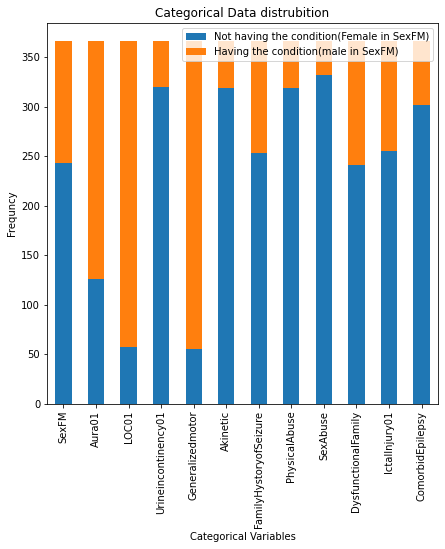

In [ ]:

df_stacked=pd.DataFrame({'Not having the condition(Female in SexFM)':[df.iloc[:,i].isin([0]).sum() for i in [2,4,5,6,7,8,9,10,11,12,13,14]],'Having the condition(male in SexFM)':[df.iloc[:,i].isin([1]).sum() for i in [2,4,5,6,7,8,9,10,11,12,13,14]]},
                        index=list(filter(lambda x: x not in ['Age','Ageatonset','FrequencyPermonth'],df.columns.to_list())))


plot=df_stacked.plot.bar(stacked=True,rot=90, title="Categorical Data distrubition",figsize=(7,7))
plot.set_ylabel('Frequncy')
plot.set_xlabel('Categorical Variables')
plt.show(block=True)



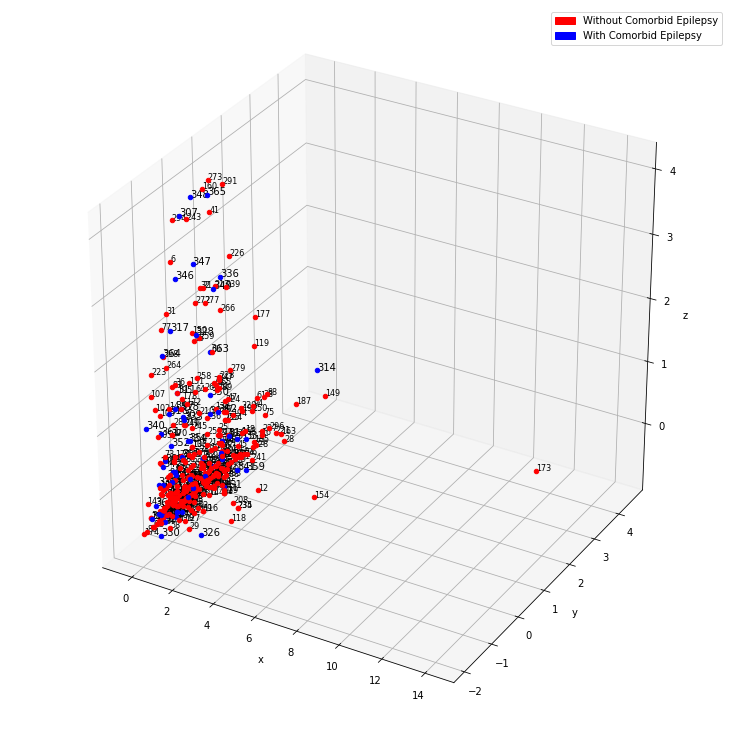

In [ ]:
pca=PCA(n_components=3,whiten=True)
new_features=pca.fit_transform(df.iloc[:,:-1].values)

fig=plt.figure(figsize=(10, 10))
ax = Axes3D(fig)

for i in df.index:
  if df.iloc[i,-1]==0:
    ax.scatter(new_features[i,0],new_features[i,1],new_features[i,2],color='r')
    ax.text(new_features[i,0],new_features[i,1],new_features[i,2],str(i),size=8,zorder=1,color='k')

  if df.iloc[i,-1]==1:
    ax.scatter(new_features[i,0],new_features[i,1],new_features[i,2],color='b')
    ax.text(new_features[i,0],new_features[i,1],new_features[i,2],str(i),size=10,zorder=1,color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
red_patch = mpatches.Patch(color='red', label='Without Comorbid Epilepsy')
blue_patch = mpatches.Patch(color='blue', label='With Comorbid Epilepsy')
plt.legend(handles=[red_patch,blue_patch],loc='upper right')
plt.show()

In [ ]:
list1=df[df['Age']>=59].index.tolist()
list2=df[df['FrequencyPermonth']>=114].index.tolist()
list3=df[df['Ageatonset']>=50].index.tolist()
list4=[173,154]
df_preprocessed=df.drop(list4+list1,axis=0)
print(df_preprocessed,'\n\n Age: %s at indices %s ageatonset: %s at indices %s PCA: %s at indices %s FrequencyPermonth: %s at indices %s'
      %(len(list1),list1,len(list3),list3,len(list4),list4,len(list2),list2))

      Age  Ageatonset  ...  IctalInjury01  ComorbidEpilepsy
0    16.0        16.0  ...            0.0               0.0
1    23.0        23.0  ...            0.0               0.0
2    31.0        29.0  ...            0.0               0.0
3    21.0        21.0  ...            0.0               0.0
4    27.0        27.0  ...            0.0               0.0
..    ...         ...  ...            ...               ...
361  21.0        12.0  ...            1.0               1.0
362  23.0        22.5  ...            1.0               1.0
363  35.0        20.0  ...            1.0               1.0
364  23.0         5.0  ...            1.0               1.0
365  48.0        18.0  ...            1.0               1.0

[361 rows x 15 columns] 

 Age: 3 at indices [149, 187, 314] ageatonset: 8 at indices [16, 75, 88, 149, 187, 221, 296, 314] PCA: 2 at indices [173, 154] FrequencyPermonth: 33 at indices [11, 12, 27, 28, 29, 60, 61, 69, 93, 100, 111, 116, 118, 127, 129, 154, 163, 173, 194, 208, 2

In [ ]:
df_preprocessed.describe()

,Age,Ageatonset,SexFM,FrequencyPermonth,Aura01,LOC01,Urineincontinency01,Generalizedmotor,Akinetic,FamilyHystoryofSeizure,PhysicalAbuse,SexAbuse,DysfunctionalFamily,IctalInjury01,ComorbidEpilepsy
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,28.451524,23.680055,1.332410,34.171274,0.659280,0.844875,0.127424,0.847645,0.130194,0.307479,0.130194,0.094183,0.335180,0.307479,0.174515
std,9.686388,9.509182,0.471731,61.663995,0.474609,0.362526,0.333910,0.359863,0.336984,0.462090,0.336984,0.292488,0.472709,0.462090,0.380079
min,10.000000,5.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,17.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,22.000000,1.000000,8.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,29.500000,2.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,54.000000,51.000000,2.000000,450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
stats.ks_2samp(df_preprocessed.iloc[:,3],df.iloc[:,3])

Ks_2sampResult(statistic=0.007901548521865491, pvalue=1.0)

In [ ]:
x=2
stats.chi2_contingency(np.array([[df_preprocessed.iloc[:,x].isin([1]).sum(),df_preprocessed.iloc[:,x].isin([2]).sum()],
                                 [df.iloc[:,x].isin([1]).sum(),df.iloc[:,x].isin([2]).sum()]]))

(0.0006680828123585025,
 0.9793791361108191,
 1,
 array([[240.33562586, 120.66437414],
        [243.66437414, 122.33562586]]))

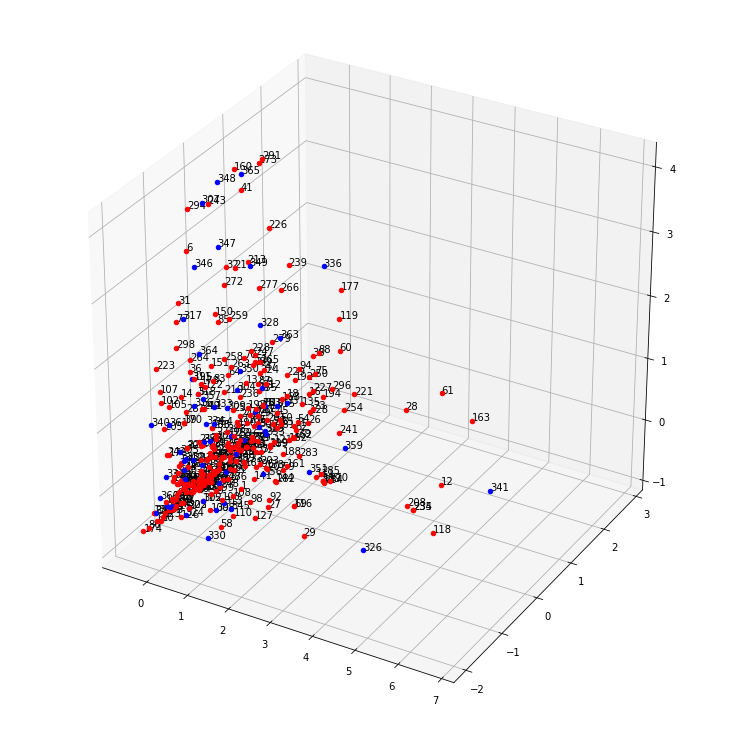

In [ ]:
pca=PCA(n_components=3,whiten=True)
new_features=pca.fit_transform(df_preprocessed.iloc[:,:-1].values)

fig=plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for i,j in enumerate(df_preprocessed.index):
  if df_preprocessed.loc[j,'ComorbidEpilepsy']==0:
    ax.scatter(new_features[i,0],new_features[i,1],new_features[i,2],color='r')
    ax.text(new_features[i,0],new_features[i,1],new_features[i,2],str(j),size=10,zorder=1,color='k')

  if df_preprocessed.loc[j,'ComorbidEpilepsy']==1:
    ax.scatter(new_features[i,0],new_features[i,1],new_features[i,2],color='b')
    ax.text(new_features[i,0],new_features[i,1],new_features[i,2],str(j),size=10,zorder=1,color='k')

In [ ]:
pyreadstat.write_sav(df_preprocessed,'whole_datasetafterpre.sav')

In [ ]:
df1=df_preprocessed.sample(frac=1,random_state=0)
print(df1['ComorbidEpilepsy'].values)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.

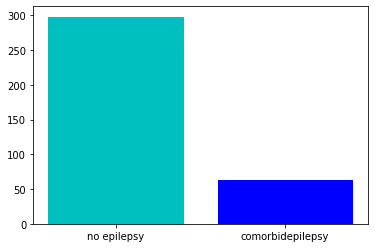

In [ ]:
plt.bar(['no epilepsy','comorbidepilepsy'],df1['ComorbidEpilepsy'].value_counts().values,color=['c','b'])
plt.show()

In [ ]:
def normalize(x):
  return (x-np.min(x))/(np.max(x)-np.min(x))
 
df2=df1.apply(normalize,axis=0)
print(df2)

          Age  Ageatonset  ...  IctalInjury01  ComorbidEpilepsy
190  0.545455    0.565217  ...            0.0               0.0
259  0.613636    0.347826  ...            1.0               0.0
45   0.727273    0.782609  ...            0.0               0.0
26   0.727273    0.804348  ...            0.0               0.0
220  0.272727    0.304348  ...            1.0               0.0
..        ...         ...  ...            ...               ...
328  0.500000    0.195652  ...            0.0               1.0
196  0.431818    0.521739  ...            0.0               0.0
117  0.181818    0.250000  ...            0.0               0.0
47   0.727273    0.652174  ...            0.0               0.0
175  0.227273    0.282609  ...            0.0               0.0

[361 rows x 15 columns]


In [ ]:
df2.describe()

,Age,Ageatonset,SexFM,FrequencyPermonth,Aura01,LOC01,Urineincontinency01,Generalizedmotor,Akinetic,FamilyHystoryofSeizure,PhysicalAbuse,SexAbuse,DysfunctionalFamily,IctalInjury01,ComorbidEpilepsy
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.308116,0.298113,0.336066,0.026478,0.655738,0.844262,0.125683,0.849727,0.128415,0.308743,0.128415,0.092896,0.341530,0.303279,0.174863
std,0.167730,0.159447,0.473008,0.068299,0.475778,0.363103,0.331946,0.357828,0.335010,0.462607,0.335010,0.290684,0.474872,0.460304,0.380370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180328,0.187500,0.000000,0.001267,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.278689,0.273438,0.000000,0.005267,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.426230,0.390625,1.000000,0.019935,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


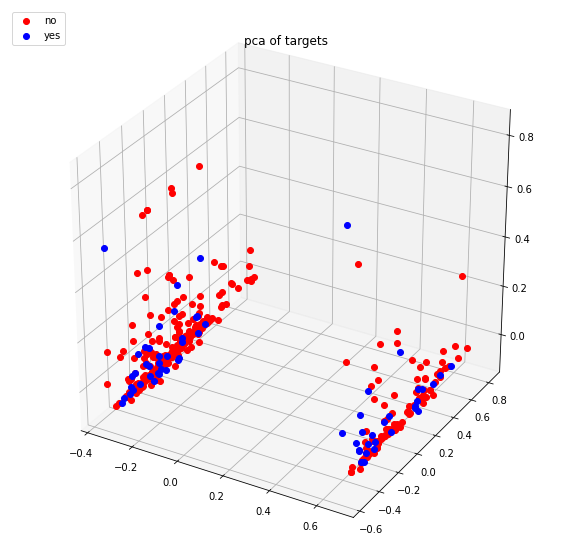

In [ ]:
pca=KernelPCA(n_components=3,kernel='linear')
new_features=pca.fit_transform(df2.iloc[:,:-1].values)

plt.figure(figsize=(10,10))
plt.axes(projection='3d')
plt.plot(new_features[np.where(df2.iloc[:,-1].values==0)[0].tolist(),0],new_features[np.where(df2.iloc[:,-1].values==0)[0].tolist(),1],new_features[np.where(df2.iloc[:,-1].values==0)[0].tolist(),2],'ro',label='no')
plt.plot(new_features[np.where(df2.iloc[:,-1].values==1)[0].tolist(),0],new_features[np.where(df2.iloc[:,-1].values==1)[0].tolist(),1],new_features[np.where(df2.iloc[:,-1].values==1)[0].tolist(),2],'bo',label='yes')
plt.title('pca of targets')
plt.legend(loc='upper left')
plt.show()

In [ ]:
def train_test2(array,test_size,cat_idx,level_of_sig_mann,level_of_sig_chi,level_of_sig_kol):

  list_idxs= []

  def my_filter(x):

    unchosen_idxs = list(set (range(array.shape[0])) - set (x))
    test_array=array[x,:]
    train_array=array[unchosen_idxs,:]

    list_of_distrubition_stat=[]

    for i in range(array.shape[1]):

      if i in cat_idx:
        obs=np.array([[(train_array[:,i]==0).sum(),(train_array[:,i]==1).sum()],[(array[:,i]==0).sum(),(array[:,i]==1).sum()]])
        obs2=np.array([[(test_array[:,i]==0).sum(),(test_array[:,i]==1).sum()],[(array[:,i]==0).sum(),(array[:,i]==1).sum()]])

        g, p, dof, expctd2 =stats.chi2_contingency(obs)
        g2, p2, dof2, expctd2 = stats.chi2_contingency(obs2)

        if p<=level_of_sig_chi or p2<=level_of_sig_chi:
          list_of_distrubition_stat.append(False)
        else:
          list_of_distrubition_stat.append(True)

      
      else:
        stat , p = stats.ks_2samp(train_array[:,i],array[:,i])
        stat2 , p2 = stats.ks_2samp(array[:,i],test_array[:,i])

        if p<=level_of_sig_kol or p2<=level_of_sig_kol:
          list_of_distrubition_stat.append(False)

        else:

          statman , pman=stats.mannwhitneyu(train_array[:,i],array[:,i])
          statman2 , pman2=stats.mannwhitneyu(test_array[:,i],array[:,i])

          if pman<=level_of_sig_mann or pman2<=level_of_sig_mann:
            list_of_distrubition_stat.append(False)

          else:
            list_of_distrubition_stat.append(True)
    
    out=np.array(list_of_distrubition_stat)

    if np.all(out):
      return True
    
    else:
      return False
    
  for i in range(10000):
    x=np.random.choice(range(array.shape[0]),round(array.shape[0]*test_size),replace=False).tolist()
    list_idxs.append(x)

  desired_idxs= filter(  my_filter ,list_idxs)

  for i in desired_idxs:
    return array[i,:] , array[list(set (range(array.shape[0])) - set (i)),:]




In [ ]:
np.random.seed(105)
x_valid_or , x_train_or = train_test2(df2.values,0.2,[2,4,5,6,7,8,9,10,11,12,13,14],0.2,0.5,0.5)
x_test_or , x_train_or = train_test2(x_train_or,0.1,[2,4,5,6,7,8,9,10,11,12,13,14],0.2,0.5,0.5)

In [ ]:
stats.ks_2samp(x_train_or[:,1],df2.iloc[:,1].values)

Ks_2sampResult(statistic=0.01695230998509687, pvalue=0.9999999996803022)

In [ ]:
stats.chi2_contingency(np.array([[(x_valid_or[:,-1]==0).sum(),(x_valid_or[:,-1]==1).sum()],
                                 [df2.iloc[:,-1].isin([0]).sum(),df2.iloc[:,-1].isin([1]).sum()]]))

(0.3191006117003337,
 0.5721486463014112,
 1,
 array([[ 59.86143187,  12.13856813],
        [300.13856813,  60.86143187]]))

In [ ]:
print(np.mean(x_valid_or,axis=0) , np.mean(x_train_or,axis=0) , np.mean(df2.values,axis=0))

[0.40530303 0.40920894 0.36111111 0.07542262 0.61111111 0.875
 0.11111111 0.81944444 0.15277778 0.26388889 0.125      0.06944444
 0.36111111 0.27777778 0.13888889] [0.42447552 0.40340301 0.33076923 0.07672201 0.67307692 0.84230769
 0.13461538 0.85384615 0.12307692 0.31923077 0.13076923 0.09615385
 0.33076923 0.32307692 0.18846154] [0.41935281 0.40608816 0.33240997 0.07573077 0.65927978 0.84487535
 0.12742382 0.84764543 0.13019391 0.30747922 0.13019391 0.09418283
 0.33518006 0.30747922 0.17451524]


In [ ]:
df3=pd.DataFrame(x_train_or,columns=df2.columns)
print(df3)

     Aura01  FrequencyPermonth  Ageatonset       Age  ComorbidEpilepsy
0       1.0           0.099800    0.304348  0.272727               0.0
1       1.0           0.030896    0.521739  0.454545               0.0
2       1.0           0.017559    0.239130  0.840909               0.0
3       1.0           0.008669    0.065217  0.545455               0.0
4       1.0           0.066459    0.239130  0.272727               0.0
..      ...                ...         ...       ...               ...
248     0.0           0.002000    0.347826  0.250000               0.0
249     0.0           0.002000    0.239130  0.340909               0.0
250     1.0           0.033118    0.630435  0.681818               0.0
251     0.0           0.002000    0.652174  0.681818               0.0
252     1.0           0.199822    0.195652  0.500000               1.0

[253 rows x 5 columns]


In [ ]:
pyreadstat.write_sav(df3,'train.sav')

In [ ]:
df4=pd.DataFrame(x_valid_or,columns=df2.columns)
print(df4)

     Aura01  FrequencyPermonth  Ageatonset       Age  ComorbidEpilepsy
0       1.0           0.004223    0.108696  0.000000               0.0
1       1.0           0.026450    0.369565  0.409091               1.0
2       1.0           0.022005    0.282609  0.204545               0.0
3       1.0           0.000445    0.413043  0.363636               0.0
4       1.0           0.004223    0.804348  0.772727               0.0
..      ...                ...         ...       ...               ...
103     1.0           0.017559    0.630435  0.568182               0.0
104     1.0           0.017559    0.586957  0.568182               0.0
105     1.0           0.199822    0.456522  0.363636               0.0
106     0.0           0.066459    0.380435  0.295455               1.0
107     1.0           0.002000    0.663043  0.613636               0.0

[108 rows x 5 columns]


In [ ]:
pyreadstat.write_sav(df4,'valid.sav')

In [ ]:
x_train_or , y_train_or = x_train_or[:,:-1] , x_train_or[:,-1]
x_valid_or , y_valid_or = x_valid_or[:,:-1] ,x_valid_or[:,-1]
x_test_or , y_test_or = x_test_or[:,:-1] ,x_test_or[:,-1]

In [ ]:
 clf = RandomForestClassifier(n_estimators=834,max_depth=1559,min_samples_split=231,min_samples_leaf=87,max_features='auto',bootstrap=False,class_weight='balanced')

In [ ]:

n_estimators = range(1,2000)

max_features = ['auto', 'sqrt']

max_depth = range(1,2000)

min_samples_split = range(1,270)

min_samples_leaf = range(1,270)

bootstrap = [True, False]
class_weight=['balanced',None]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight}

In [ ]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='balanced_accuracy')
rf_random.fit(df2.iloc[:,:-1].values, df2.iloc[:,-1].values)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 10.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=395,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=75,
                                                    min_samples_split=189,
                                                    min_weight_fraction_leaf=0.0,
      

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'max_depth': 1559,
 'max_features': 'auto',
 'min_samples_leaf': 87,
 'min_samples_split': 231,
 'n_estimators': 834}

In [ ]:
rfecv=feature_selection.RFECV(estimator=clf,scoring='balanced_accuracy',cv=5)
rfecv.fit(df2.iloc[:,:-1].values, df2.iloc[:,-1].values)
rfecv.transform(df2.iloc[:,:-1].values)

array([[0.00000000e+00, 2.00044454e-03, 5.65217391e-01, 5.45454545e-01],
       [1.00000000e+00, 2.64503223e-02, 3.47826087e-01, 6.13636364e-01],
       [1.00000000e+00, 6.44587686e-03, 7.82608696e-01, 7.27272727e-01],
       ...,
       [0.00000000e+00, 1.75594577e-02, 2.50000000e-01, 1.81818182e-01],
       [1.00000000e+00, 8.66859302e-03, 6.52173913e-01, 7.27272727e-01],
       [1.00000000e+00, 4.44543232e-04, 2.82608696e-01, 2.27272727e-01]])

In [ ]:
rfecv.support_

array([False,  True, False, False, False, False,  True,  True,  True])

In [ ]:
rfecv.n_features_

4

In [ ]:
rfecv.ranking_

array([3, 1, 6, 5, 4, 2, 1, 1, 1])

In [ ]:
df2

,SexFM,Aura01,LOC01,Generalizedmotor,Akinetic,FamilyHystoryofSeizure,FrequencyPermonth,Ageatonset,Age,ComorbidEpilepsy
190,0.0,0.0,1.0,1.0,0.0,1.0,0.002000,0.565217,0.545455,0.0
259,0.0,1.0,1.0,1.0,0.0,0.0,0.026450,0.347826,0.613636,0.0
45,0.0,1.0,1.0,1.0,0.0,0.0,0.006446,0.782609,0.727273,0.0
26,1.0,0.0,1.0,1.0,0.0,0.0,0.099800,0.804348,0.727273,0.0
220,0.0,1.0,1.0,1.0,0.0,0.0,0.099800,0.304348,0.272727,0.0
...,...,...,...,...,...,...,...,...,...,...
328,0.0,1.0,0.0,1.0,0.0,1.0,0.199822,0.195652,0.500000,1.0
196,0.0,1.0,1.0,0.0,1.0,1.0,0.099800,0.521739,0.431818,0.0
117,1.0,0.0,0.0,1.0,0.0,1.0,0.017559,0.250000,0.181818,0.0
47,0.0,1.0,1.0,1.0,0.0,0.0,0.008669,0.652174,0.727273,0.0


In [ ]:
 clf = RandomForestClassifier(n_estimators=1136,max_depth=540,min_samples_leaf=64,min_samples_split=23,bootstrap=True,class_weight='balanced')
 clf.fit(x_train_or, y_train_or)
 y_pred=clf.predict(x_valid_or)
 print(confusion_matrix(y_valid_or,y_pred),accuracy_score(y_valid_or,y_pred))

[[58 30]
 [ 8 12]] 0.6481481481481481


In [ ]:
preds = clf.predict(df2.iloc[:,:-1].values)
print(confusion_matrix(df2.iloc[:,-1].values,preds),accuracy_score(df2.iloc[:,-1].values,preds))

[[191 107]
 [ 20  43]] 0.6481994459833795


In [ ]:
importances=clf.feature_importances_
print(importances)

[0.00088028 0.28257042 0.47711268 0.23943662]


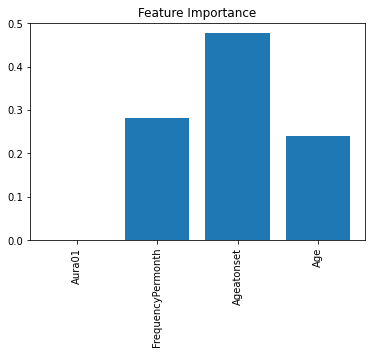

In [ ]:

plt.figure()

plt.title("Feature Importance")

plt.bar(range(x_train_or.shape[1]), importances)

plt.xticks(range(x_train_or.shape[1]), df2.columns, rotation=90)

plt.show()

In [ ]:
n_estimators = range(500,2000)

max_features = ['auto', 'sqrt']

max_depth = range(500,2000)

min_samples_split = range(1,50)

min_samples_leaf = range(1,100)

bootstrap = [True, False]
class_weight=['balanced',None]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight}

In [ ]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='balanced_accuracy')
rf_random.fit(x_train_or, y_train_or)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 22.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=681,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=73,
                                                    min_samples_split=24,
                                                    min_weight_fraction_leaf=0.0,
       

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 540,
 'max_features': 'auto',
 'min_samples_leaf': 64,
 'min_samples_split': 23,
 'n_estimators': 1136}

In [ ]:
decisiontree = DecisionTreeClassifier(criterion='entropy',max_depth=1306,min_samples_leaf=16,min_samples_split=82,class_weight='balanced',max_features='auto',random_state=0)
clf_tree=decisiontree.fit(x_train_or, y_train_or)
y_pred=decisiontree.predict(x_valid_or)

#plt.figure(figsize=(40,40))
#tree.plot_tree(clf_tree)

print(confusion_matrix(y_valid_or,y_pred),accuracy_score(y_valid_or,y_pred))

[[45 43]
 [ 8 12]] 0.5277777777777778


In [ ]:
preds = decisiontree.predict(df2.iloc[:,:-1].values)
print(confusion_matrix(df2.iloc[:,-1].values,preds),accuracy_score(df2.iloc[:,-1].values,preds))

[[158 140]
 [ 14  49]] 0.5734072022160664


In [ ]:
splitter=['best','random']
criterion=['entropy','gini']

max_features = ['auto', 'sqrt','log2']

max_depth = range(1000,2000)

min_samples_split = range(1,270)

min_samples_leaf = range(1,270)

class_weight=['balanced',None]

random_grid_tree = {'splitter':splitter,
                    'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'class_weight':class_weight}

In [ ]:
rf_random = RandomizedSearchCV(estimator = decisiontree, param_distributions = random_grid_tree, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='balanced_accuracy')
rf_random.fit(x_train_or, y_train_or)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=1908,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=12,
                                                    min_samples_split=83,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
   

In [ ]:
rf_random.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 1306,
 'max_features': 'auto',
 'min_samples_leaf': 16,
 'min_samples_split': 82,
 'splitter': 'best'}

In [ ]:
clf1 = svm.SVC(C=17.105263157894736,kernel='poly',degree=1,gamma=16.210526315789473,coef0=16.210526315789473,shrinking=False,class_weight='balanced',probability=True)
clf1.fit(x_train_or, y_train_or)
y_pred=clf1.predict(x_valid_or)
print(confusion_matrix(y_valid_or,y_pred),accuracy_score(y_valid_or,y_pred))

[[54 34]
 [ 7 13]] 0.6203703703703703


In [ ]:
preds = clf1.predict(df2.iloc[:,:-1].values)
print(confusion_matrix(df2.iloc[:,-1].values,preds),accuracy_score(df2.iloc[:,-1].values,preds))

[[177 121]
 [ 21  42]] 0.6066481994459834


In [ ]:

class_weight=['balanced',None]
c=np.linspace(1,18,20).tolist()
kernel=['linear','poly','rbf','sigmoid']
degree=range(1,5)
gamma=np.linspace(1,18,20).tolist()
coef0=np.linspace(1,18,20).tolist()
shrinking=[True,False]
random_grid_svm = {'class_weight':class_weight,
                   'C':c,
                   'kernel':kernel,
                   'degree':degree,
                   'gamma':gamma,
                   'coef0':coef0,
                   'shrinking':shrinking}

In [ ]:
rf_random = RandomizedSearchCV(estimator = clf1, param_distributions = random_grid_svm, n_iter = 200, cv =3, verbose=2, random_state=42, n_jobs = -1, scoring='balanced_accuracy')
rf_random.fit(x_train_or, y_train_or)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  8.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'C': [1.0, 1.894736...
                                                  9.947368421052632,
                                                  10.842105263157896,
                                                  11.736842105263158,
                                                  12.631578947368421,
                                                  13.526315789473685,
                                                  14.

In [ ]:
rf_random.best_params_

{'C': 17.105263157894736,
 'class_weight': 'balanced',
 'coef0': 16.210526315789473,
 'degree': 1,
 'gamma': 16.210526315789473,
 'kernel': 'poly',
 'shrinking': False}

In [ ]:
 neigh = KNeighborsClassifier(n_neighbors=6,leaf_size=79,p=2,algorithm='kd_tree',weights='distance')
 neigh.fit(x_train_or, y_train_or)
 y_pred=neigh.predict(x_valid_or)
 print(confusion_matrix(y_valid_or,y_pred),accuracy_score(y_valid_or,y_pred))

[[83  5]
 [16  4]] 0.8055555555555556


In [ ]:
preds = neigh.predict(df2.iloc[:,:-1].values)
print(confusion_matrix(df2.iloc[:,-1].values,preds),accuracy_score(df2.iloc[:,-1].values,preds))

[[293   5]
 [ 17  46]] 0.9390581717451524


In [ ]:
n_neighbors=range(1,20)
weights=['uniform','distance']
algorithm=['ball_tree','kd_tree','brute','auto']
leaf_size=range(1,100)
p=[1,2]
random_grid_neigh = {'n_neighbors':n_neighbors,
                   'weights':weights,
                   'algorithm':algorithm,
                   'leaf_size':leaf_size,
                   'p':p}

In [ ]:
rf_random = RandomizedSearchCV(estimator = neigh, param_distributions = random_grid_neigh, n_iter = 500, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='balanced_accuracy')
rf_random.fit(x_train_or, y_train_or)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    5.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=14,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=1,
                                                  p=1, weights='uniform'),
                   iid='deprecated', n_iter=500, n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'leaf_size': range(1, 100),
                                        'n_neighbors': range(1, 20),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state

In [ ]:
rf_random.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 79,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'distance'}

In [ ]:
clf = TabNetClassifier(n_d=70,n_a=70,
                       n_steps=4,
                       gamma=1.3,
                       lambda_sparse=0.007,
                       momentum=0.01,
                       n_independent=2,
                       n_shared=2,
                       cat_idxs=[2,4,5,6,7,8,9,10,11,12,13],
                       cat_dims=11*[2],
                       cat_emb_dim=11*[3],
                        optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=5e-3),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax') 

clf.fit(x_train_or, y_train_or,
        weights=1,
        max_epochs=300,
        eval_set=[(x_train_or, y_train_or), (x_valid_or, y_valid_or)],
        eval_name=['train', 'valid'],
        batch_size=32, virtual_batch_size=8,
        eval_metric=['balanced_accuracy'],patience=20)


preds = clf.predict(x_valid_or)

print(confusion_matrix(y_valid_or,preds),accuracy_score(y_valid_or,preds))

Device used : cuda
epoch 0  | loss: 1.32588 | train_balanced_accuracy: 0.58405 | valid_balanced_accuracy: 0.55323 |  0:00:00s
epoch 1  | loss: 1.07737 | train_balanced_accuracy: 0.53342 | valid_balanced_accuracy: 0.52419 |  0:00:00s
epoch 2  | loss: 1.24302 | train_balanced_accuracy: 0.52481 | valid_balanced_accuracy: 0.50645 |  0:00:01s
epoch 3  | loss: 1.29375 | train_balanced_accuracy: 0.55619 | valid_balanced_accuracy: 0.55161 |  0:00:01s
epoch 4  | loss: 0.9336  | train_balanced_accuracy: 0.56258 | valid_balanced_accuracy: 0.54194 |  0:00:02s
epoch 5  | loss: 0.97314 | train_balanced_accuracy: 0.49231 | valid_balanced_accuracy: 0.47903 |  0:00:02s
epoch 6  | loss: 0.96108 | train_balanced_accuracy: 0.57133 | valid_balanced_accuracy: 0.52581 |  0:00:03s
epoch 7  | loss: 0.84738 | train_balanced_accuracy: 0.50943 | valid_balanced_accuracy: 0.54516 |  0:00:03s
epoch 8  | loss: 0.82558 | train_balanced_accuracy: 0.57138 | valid_balanced_accuracy: 0.4871  |  0:00:04s
epoch 9  | loss: 0

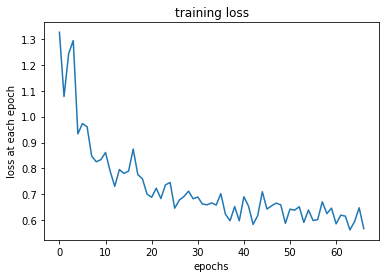

In [ ]:
plt.plot(clf.history['loss'])
plt.title('training loss')
plt.xlabel('epochs')
plt.ylabel('loss at each epoch')
plt.show()

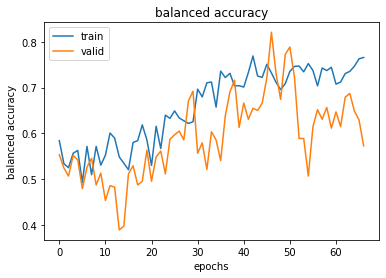

In [ ]:
plt.plot(clf.history['train_balanced_accuracy'],label='train')
plt.plot(clf.history['valid_balanced_accuracy'],label='valid')
plt.title('balanced accuracy')
plt.xlabel('epochs')
plt.ylabel('balanced accuracy')
plt.legend(loc='upper left')
plt.show()

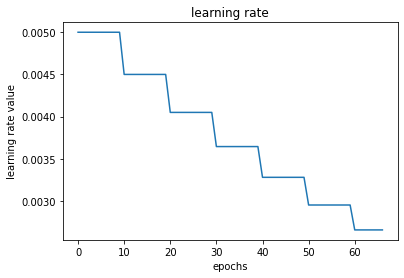

In [ ]:
plt.plot(clf.history['lr'])
plt.title('learning rate')
plt.xlabel('epochs')
plt.ylabel('learning rate value')
plt.show()

In [ ]:
preds = clf.predict(x_test_or)
print(confusion_matrix(y_test_or,preds),accuracy_score(y_test_or,preds))

[[16  9]
 [ 1  3]] 0.6551724137931034


In [ ]:
preds = clf.predict(df2.iloc[:,:-1].values)
print(confusion_matrix(df2.iloc[:,-1].values,preds),accuracy_score(df2.iloc[:,-1].values,preds))

[[203  95]
 [ 12  51]] 0.703601108033241


In [ ]:
tab_importance=clf.feature_importances_
aaa=np.argsort(clf.feature_importances_)[::-1]

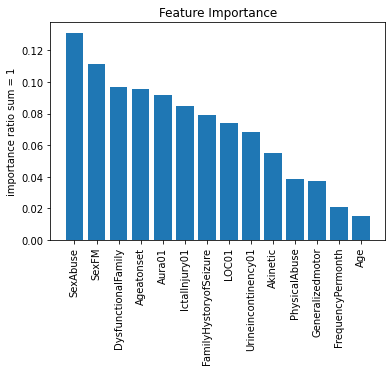

In [ ]:
plt.figure()

plt.title("Feature Importance")

plt.bar(range(x_train_or.shape[1]), tab_importance[aaa])

plt.xticks(range(x_train_or.shape[1]), df2.columns[aaa], rotation=90)
plt.ylabel('importance ratio sum = 1')

plt.show()

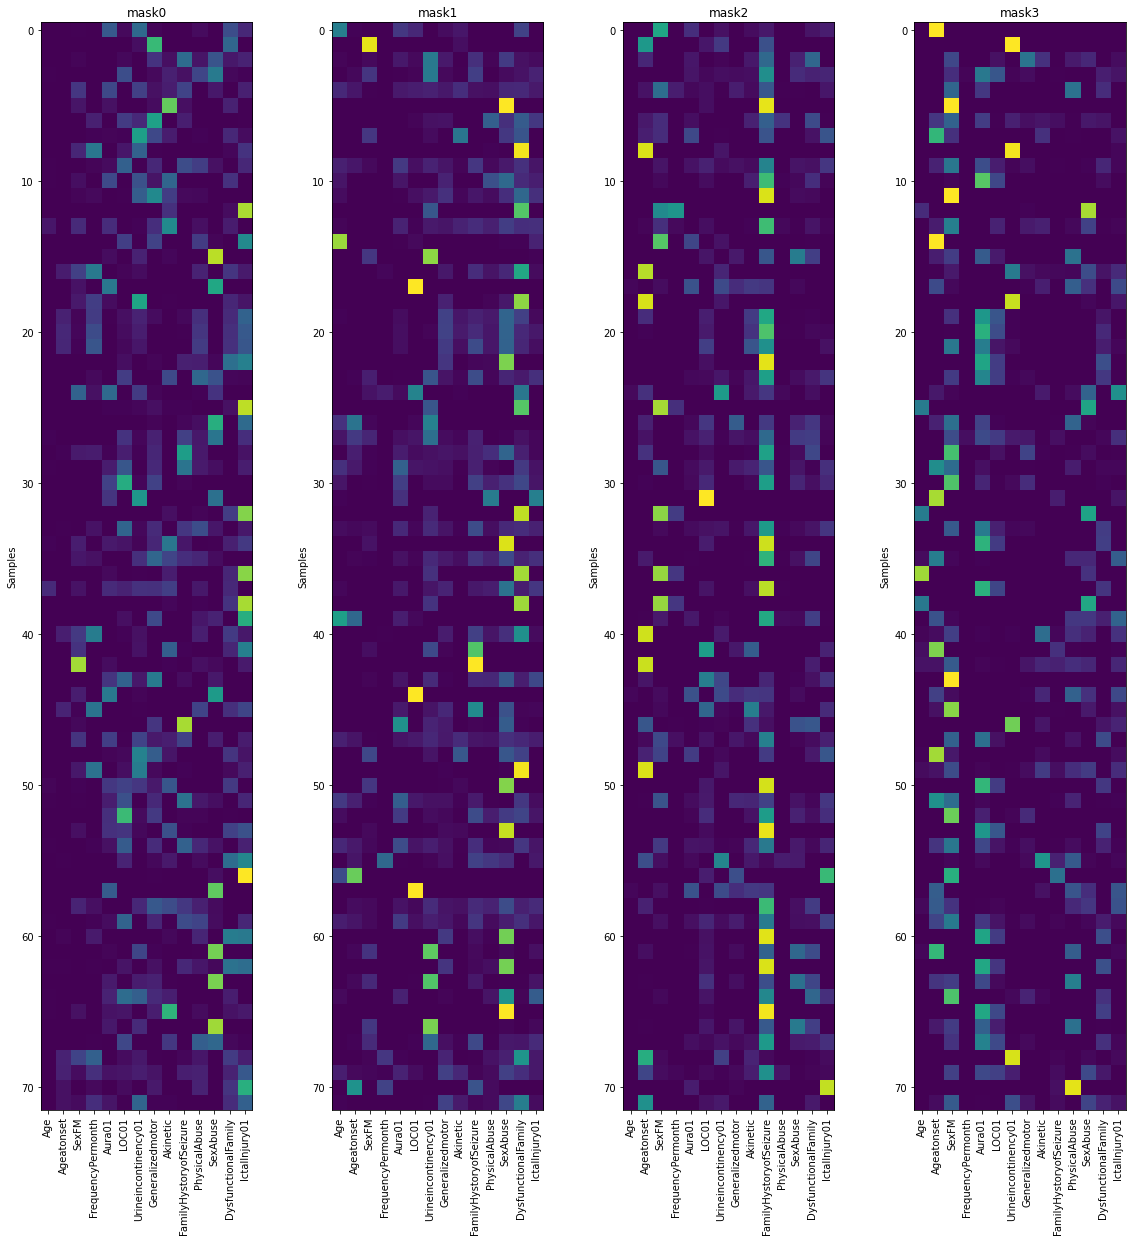

In [ ]:
matrix,mask=clf.explain(x_valid_or)

plt.figure(figsize=(20,20))

for i in range(4):
  plt.subplot(1,4,1+i)
  plt.imshow(mask[i][:])
  plt.title(f'mask{i}')
  plt.ylabel('Samples')
  plt.xticks(range(x_train_or.shape[1]), df2.columns,rotation=90)

In [ ]:
clf.save_model('/content/drive/MyDrive/TabNet')

Successfully saved model at /content/drive/MyDrive/TabNet.zip


'/content/drive/MyDrive/TabNet.zip'

In [ ]:
loaded_clf = TabNetClassifier()
loaded_clf.load_model('/content/drive/MyDrive/TabNet.zip')

Device used : cpu
Device used : cpu
